 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [39]:
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [41]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [42]:
#Analizamos que variables no ayudan y lo eliminamos: 'ssc_b','hsc_b','hsc_s','degree_t','salary'
drop_columns = ['ssc_b','hsc_b','hsc_s','degree_t','salary']

df = df.drop(columns = drop_columns)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   degree_p        215 non-null    float64
 5   workex          215 non-null    object 
 6   etest_p         215 non-null    float64
 7   specialisation  215 non-null    object 
 8   mba_p           215 non-null    float64
 9   status          215 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 16.9+ KB


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [44]:
# codigica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida
cat_features = df.select_dtypes(include = 'object')\
                 .drop(columns = 'status')

cat_features.describe()

,gender,workex,specialisation
count,215,215,215
unique,2,2,2
top,M,No,Mkt&Fin
freq,139,141,120


# Balance Dataset


In [45]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [46]:
from sklearn.utils import resample

class_0 = df[df['status'] == 'Placed'].copy()
class_1 = df[df['status'] == 'Not Placed'].copy()

class_1_bigger = resample(class_1,
                          replace = True,
                          n_samples = len(class_0),
                          random_state = 42)

balanced_data = pd.concat([class_0, class_1_bigger], axis = 0, ignore_index = True)\
                  .assign(status = lambda df: np.where(df['status'] == 'Not Placed', 1, 0))

In [47]:
balanced_data['status'].value_counts()

status
0    148
1    148
Name: count, dtype: int64

# Train Test Split

In [48]:
# Separación de feature y target
X = balanced_data.copy().drop('status', axis = 1)
y = balanced_data['status'].copy()


In [80]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 123, stratify = y)
# Puedes usar esta celda como punto de partida


# Feature Scaling

In [81]:
# scalar las características de x_train y x_test
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Puedes usar esta celda como punto de partida
num_features = X_train.select_dtypes(include = np.number)
num_features.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000
mean,105.405797,64.084734,64.038309,64.370483,70.61401,61.779952
std,65.836437,11.296387,11.554811,7.532431,12.70925,5.901738
min,1.000000,41.000000,37.000000,50.000000,50.00000,51.210000
25%,43.000000,54.000000,57.000000,59.000000,60.00000,57.495000
50%,105.000000,63.000000,63.000000,64.800000,68.00000,61.300000
75%,168.000000,73.000000,71.700000,69.000000,79.00000,65.500000
max,214.000000,89.400000,97.700000,85.000000,97.40000,77.890000


In [82]:
# construct preprocessing
encoder = OneHotEncoder(drop = 'if_binary',
                        handle_unknown = 'ignore',
                        sparse_output = False)

scaler = MinMaxScaler()

transformers = make_column_transformer((encoder, cat_features.columns.tolist()),
                                       (scaler, num_features.columns.tolist()),
                                       remainder = 'drop')

# 1 k-nearest neighbor

In [88]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
knn_pipe = make_pipeline(transformers, model)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workex',
                                                   'specialisation']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['sl_no', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

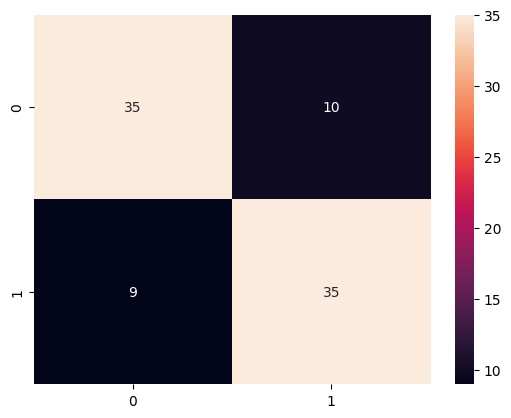

In [89]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_test_pred = knn_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

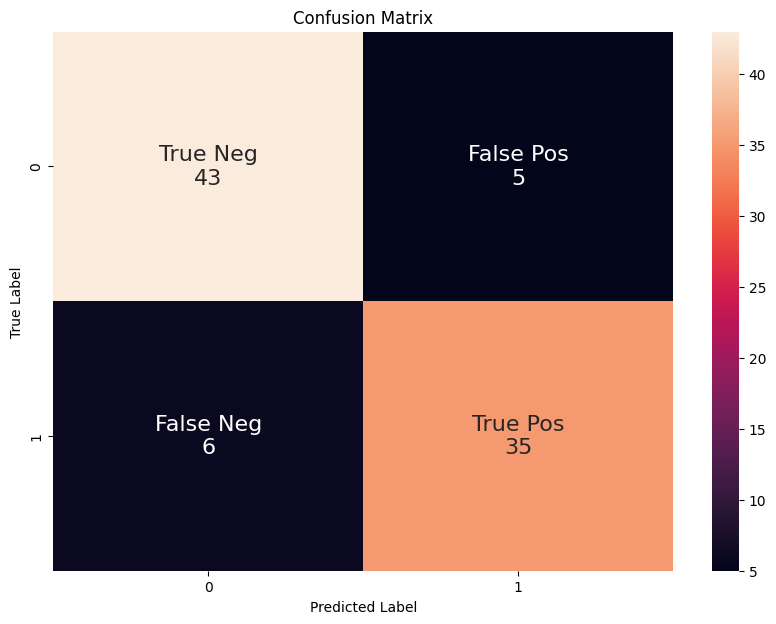

In [ ]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Decision Tree

In [91]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt_pipe = make_pipeline(transformers, model)
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workex',
                                                   'specialisation']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['sl_no', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

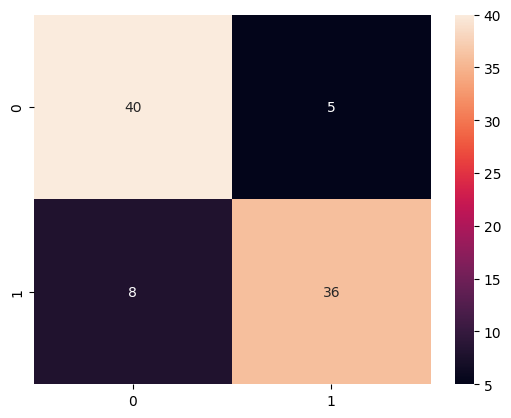

In [92]:
y_test_pred = dt_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

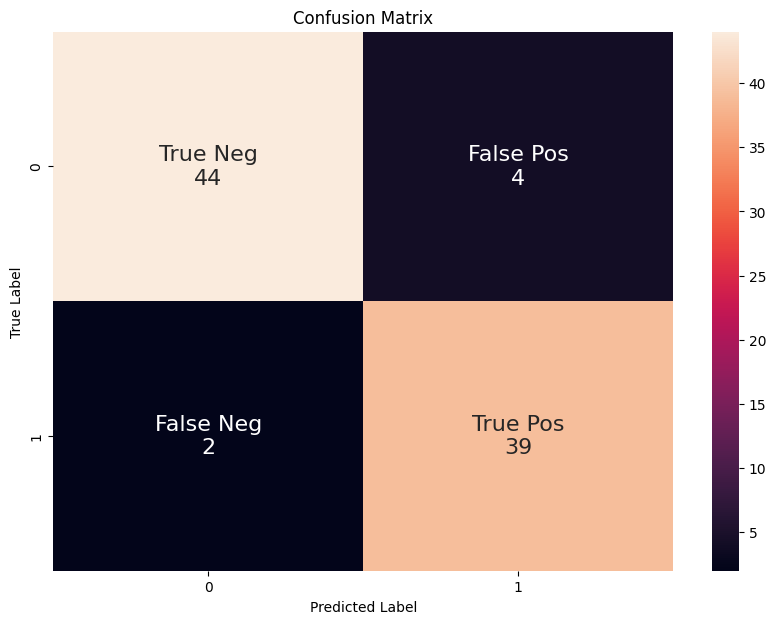

In [ ]:
# creating confusion matrix heatmap (Decision Tree)


# SVM

In [93]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
model = SVC()
sv_pipe = make_pipeline(transformers, model)
sv_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workex',
                                                   'specialisation']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['sl_no', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p'])])),
                ('svc', SVC())])

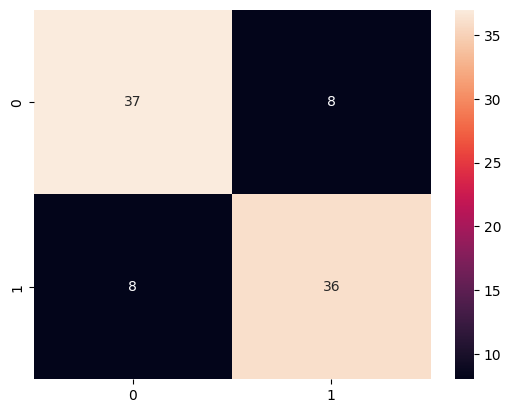

In [94]:
y_test_pred = sv_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

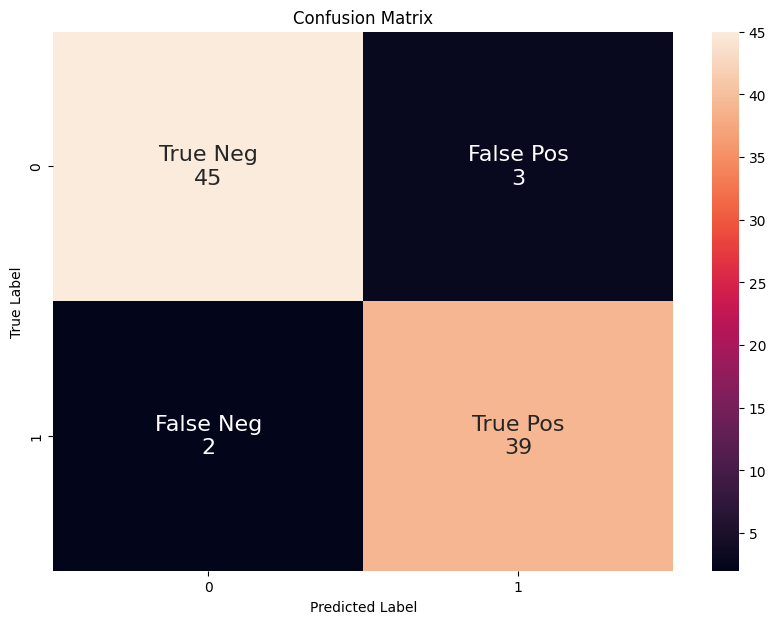

In [ ]:
# creating confusion matrix heatmap SVM



# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rf_pipe = make_pipeline(transformers, model)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workex',
                                                   'specialisation']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['sl_no', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p'])])),
                ('randomforestclassifier', RandomForestClassifier())])

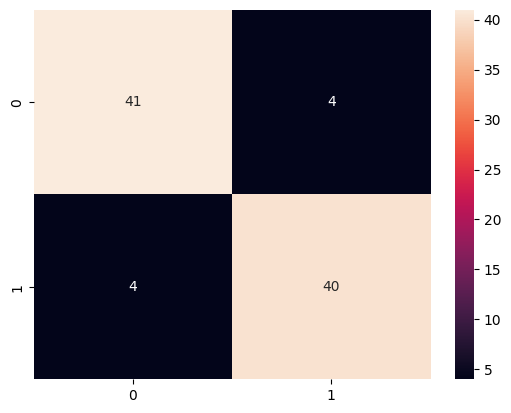

In [96]:
y_test_pred = rf_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

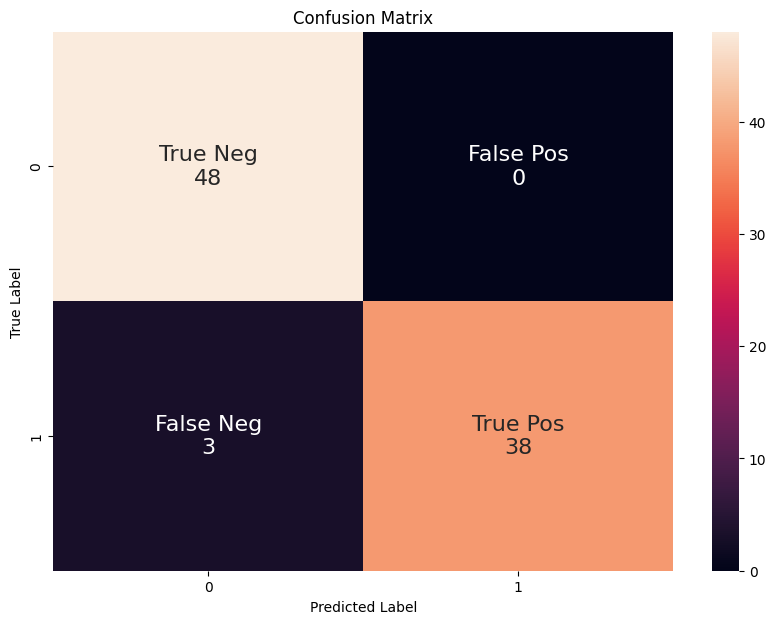

In [ ]:
# creating confusion matrix heatmap - Random Forest



# Gaussian Naive Bayes

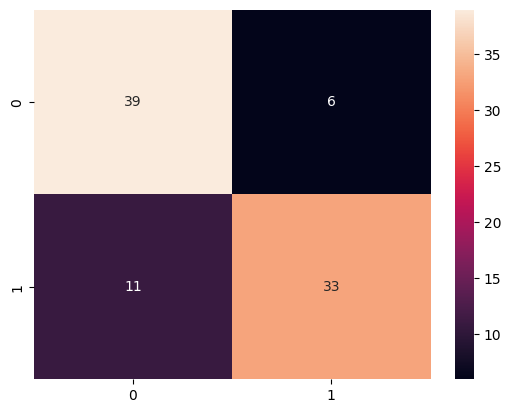

In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
gn_pipe = make_pipeline(transformers, model)
gn_pipe.fit(X_train, y_train)

y_test_pred = gn_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

# Logistic Regression

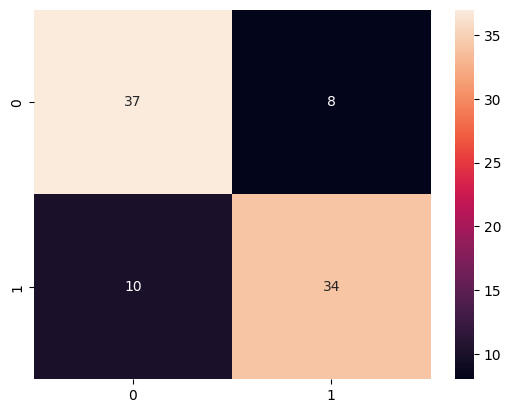

In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr_pipe = make_pipeline(transformers, model)
lr_pipe.fit(X_train, y_train)

y_test_pred = lr_pipe.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True);

## Single Input Predictions

Test si está prediciendo adecuadamente

In [99]:
# construct preprocessing
encoder = OneHotEncoder(drop = 'if_binary',
                        handle_unknown = 'ignore',
                        sparse_output = False)
scaler = MinMaxScaler()

transformers = make_column_transformer((encoder, cat_features.columns.tolist()),
                                       (scaler, num_features.columns.tolist()),
                                       remainder = 'drop')

model = RandomForestClassifier()
rf_pipe = make_pipeline(transformers, model)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workex',
                                                   'specialisation']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['sl_no', 'ssc_p', 'hsc_p',
                                                   'degree_p', 'etest_p',
                                                   'mba_p'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [116]:
sample = X_test.iloc[[0]]
y_sample = y_test.iloc[0]

prediction = rf_pipe.predict(sample)[0]

print(f'Predicted Class: {prediction}')
print(f'Actual Class: {y_sample}')

Predicted Class: 0
Actual Class: 0


Predicted Class : 1
Actual Class: 1


# Sistema de Predicción

In [ ]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):

    return 0

In [119]:
sl_no = 11
gender = "F"
ssc_p = 58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

# Crear el DataFrame
sample = pd.DataFrame({'sl_no': [sl_no],
                       'gender': [gender],
                       'ssc_p': [ssc_p],
                       'hsc_p': [hsc_p],
                       'degree_p': [degree_p],
                       'workex': [workex],
                       'etest_p': [etest_p],
                       'specialisation': [specialisation],
                       'mba_p': [mba_p]})

result = rf_pipe.predict(sample)[0]

if result == 0:
    print('contratado')

else:
    print('No Contratado')

contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [122]:
import pickle

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('transformers.pkl', 'wb') as file:
    pickle.dump(transformers, file)

with open('model_pipe.pkl', 'wb') as file:
    pickle.dump(rf_pipe, file)

In [125]:
del encoder, scaler, transformers, rf_pipe

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('transformers.pkl', 'rb') as f:
    transformers = pickle.load(f)

with open('model_pipe.pkl', 'rb') as f:
    model_pipe = pickle.load(f)

In [127]:
sl_no = 11
gender = "F"
ssc_p = 58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

# Crear el DataFrame
sample = pd.DataFrame({'sl_no': [sl_no],
                       'gender': [gender],
                       'ssc_p': [ssc_p],
                       'hsc_p': [hsc_p],
                       'degree_p': [degree_p],
                       'workex': [workex],
                       'etest_p': [etest_p],
                       'specialisation': [specialisation],
                       'mba_p': [mba_p]})

result = model_pipe.predict(sample)[0]

if result == 0:
    print('contratado')

else:
    print('No Contratado')

contratado


In [129]:
X_train.specialisation.unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)